In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [88]:
img = cv2.imread(r"C:\Users\dell\Pictures\Camera Roll\WIN_20181011_22_02_24_Pro.jpg")

In [89]:
print(img.shape)

(720, 1280, 3)


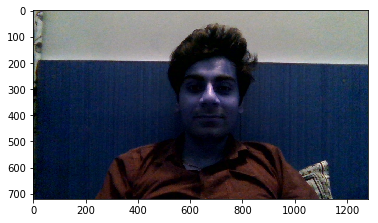

In [90]:
plt.imshow(img)

## Conversion from BGR to RGB ( Cv2 needs to fix this :P )

In [91]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

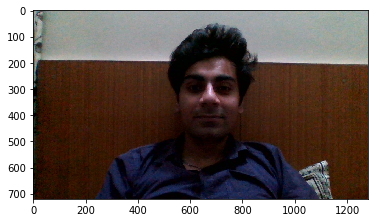

In [92]:
plt.imshow(img)

## Gosh , You forgot to import KMeans

In [15]:
from sklearn.cluster import KMeans

In [93]:
print(img.shape)
pixels = img.reshape((-1,3))
print(pixels.shape)

(720, 1280, 3)
(921600, 3)


In [100]:
km = KMeans(n_clusters=10) #
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [101]:
print(np.unique(km.labels_))

[0 1 2 3 4 5 6 7 8 9]


In [102]:
# print(km.cluster_centers_)
colors = km.cluster_centers_
print(colors)
colors = np.array(colors,dtype='uint8')
print(colors)

[[ 77.70597052  43.842091    25.61199206]
 [156.49345886 161.93629284 160.02984877]
 [ 18.03374853  19.46250631  40.26685322]
 [ 44.35582951  18.1847478    5.19934601]
 [ 90.64235281  74.02042146  75.6733652 ]
 [  6.76385402   3.04460475   5.91577478]
 [ 34.08359221  39.2824061   71.79256331]
 [178.29756174 178.2329086  178.05338996]
 [ 64.36794482  30.83929582  10.36513383]
 [123.62005141 120.48357612 120.75658383]]
[[ 77  43  25]
 [156 161 160]
 [ 18  19  40]
 [ 44  18   5]
 [ 90  74  75]
 [  6   3   5]
 [ 34  39  71]
 [178 178 178]
 [ 64  30  10]
 [123 120 120]]


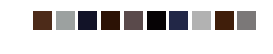

In [103]:
i = 1
plt.figure(figsize=(4,2))

for x in colors:
    plt.subplot(1,10,i)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = x
    plt.axis("off")
    plt.imshow(a)
    i+=1
    
plt.show()



In [104]:
new_img = np.zeros((720*1280,3),dtype="uint8")
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]

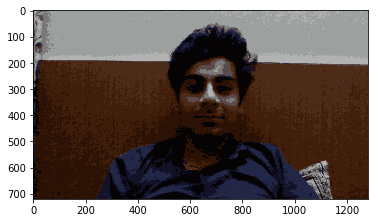

In [105]:
new_img = new_img.reshape((720,1280,3))
plt.imshow(new_img)

In [106]:
plt.imsave(arr=new_img,fname=r"G:\Coding Blocks\Documents\dinesh.png")